In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
db = pd.read_csv("temperature-anomaly.csv")
db = db[["Year","Global average temperature anomaly relative to 1861-1890","Lower bound of the annual temperature anomaly (95% confidence interval)","Upper bound of the annual temperature anomaly (95% confidence interval)"]]
db = db.rename(columns={
    "Global average temperature anomaly relative to 1861-1890" : "Anomaly",
    "Lower bound of the annual temperature anomaly (95% confidence interval)" : "Lower Bound",
    "Upper bound of the annual temperature anomaly (95% confidence interval)" : "Upper Bound"
})
print(db.head())

   Year   Anomaly  Lower Bound  Upper Bound
0  1850 -0.055414    -0.226959     0.116131
1  1851  0.128948    -0.049570     0.307466
2  1852  0.132899    -0.047085     0.312882
3  1853  0.091943    -0.067712     0.251598
4  1854  0.070777    -0.070414     0.211968


Our dataset presents 6 variables with the following types:
- Entity (Nominal)
- Code (Nominal)
- Year (Discrete Numerical)
- Global average temperature anomaly relative to 1861-1890 (Continuous Numerical)
- Lower bound of the annual temperature anomaly with 95% confidence interval (Continuous Numerical)
- Upper bound of the annual temperature anomaly with 95% confidence interval (Continuous Numerical)

Our data has anual frequency from the Industrial Revolution to the present day (1850-2025, 175 years). While the dataset provides upper and lower bounds to indicate uncertainty, these values are not essential for understanding the overall trend, as they themselves follow the trend of the global anomaly. The average anomaly alone captures how much the Earth's surface temperature has deviated from pre-industrial levels each year, which is why only the average anomaly will be used from here on out.

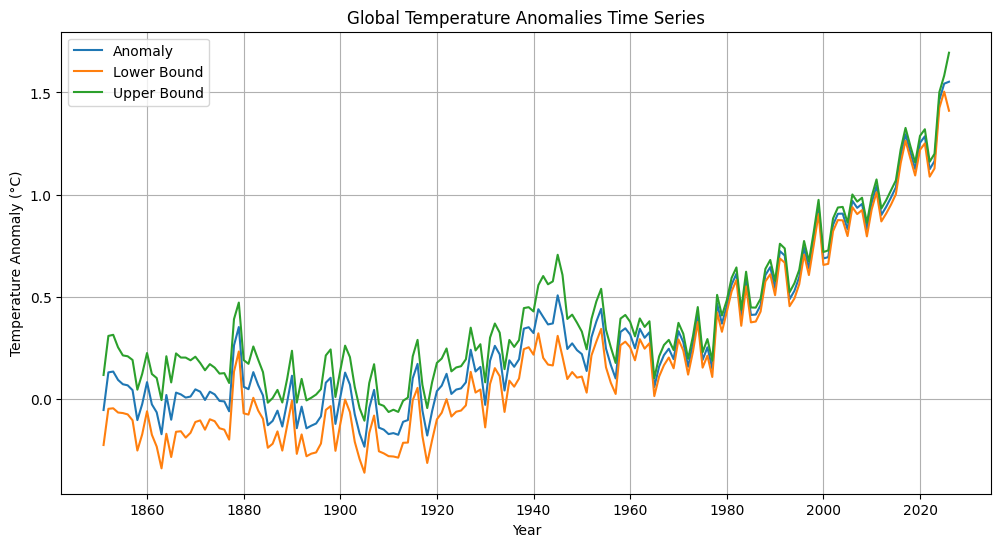

In [7]:
dates = pd.date_range(start='1850', periods=len(db), freq='YE')
mytimeseries = pd.DataFrame(db.iloc[:, 1:].values, index=dates, columns=db.columns[1:])
plt.figure(figsize=(12, 6))
for col in mytimeseries.columns:
    plt.plot(mytimeseries.index, mytimeseries[col], label=col)

plt.title("Global Temperature Anomalies Time Series")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.legend()
plt.show()